<a href="https://colab.research.google.com/github/ZackAkil/machine-learning-animations/blob/master/linear_regression_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animated Machine Learning

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

## Generate dummy data

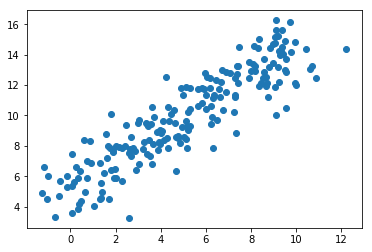

In [0]:
m = 200
end = 10

steps = np.arange(0, end, end/m)
x = steps + np.random.normal(0,1,m)
y = steps + np.random.normal(0,1,m)+5

plt.scatter(x,y)

# save axis sizes
original_data_ylim = plt.ylim()
original_data_xlim = plt.xlim()

# Define Tensorflow Model

### The varibles that TensorFlow will change

In [0]:
m_v = tf.Variable(0.0, name='coeficient')
c_v = tf.Variable(0.0, name='intercept')

my_variables = [m_v, c_v]

### The formula 

>$y=mx+c$

In [0]:
def run_model(x):
  output = (m_v * x / 10) + c_v
  return output

### What does the model look like with the default values compaired to our data?




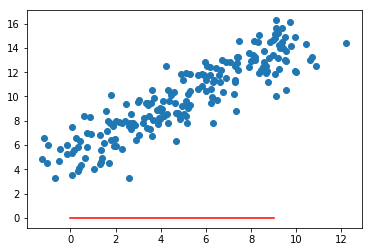

In [0]:
plt.scatter(x, y)
plt.plot(np.arange(end), run_model(np.arange(end)), c='r')
plt.show()

In [0]:
optimiser = tf.train.AdamOptimizer(learning_rate=0.3)

In [0]:
def train_single_step():
  
    with tf.GradientTape() as tape:
      loss = tf.losses.mean_squared_error(y, run_model(x))
      
    grads = tape.gradient(loss, my_variables)
    optimiser.apply_gradients(zip(grads, my_variables))

In [0]:
# for i in range(100):
#   train_single_step()

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [0]:
def model_equation(m, c):
  return r'$y=('+str(round(m/10,2))+r')x+('+str(round(c,1))+r')$'

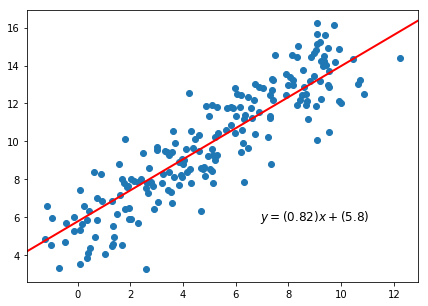

<Figure size 900x600 with 0 Axes>

In [0]:
# create figure
fig, ax = plt.subplots(figsize=(7, 5))
plt.figure(dpi=150)

# set axis configs
ax.set(xlim=original_data_xlim, ylim=original_data_ylim)

# show read data
scat = ax.scatter(x, y)
# show model line
line = ax.plot(range(-end,end*2), [0]*(end*3), color='r', lw=2)[0]
# show label of model equation
label = ax.text(9, 6, model_equation(0, 0),
                ha='center', va='center',
                fontsize=12)

# create animation function
def animate(frame_index):
  # do something (train model fro 1 epoch)
  train_single_step()

  # set label text
  label.set_text(model_equation(m_v.numpy(), c_v.numpy()))
  
  # update data in graph
  model_line = run_model(range(-end,end*2))
  line.set_ydata(model_line)

# run animation
anim = FuncAnimation(fig, animate, interval=50, frames=130)

# show animation
HTML(anim.to_html5_video())